# Práctica 1 #

### Redes Neuronales ###

**Jesús Alberto Reyes Gutiérrez**

Profesor 	Víctor Germán Mijangos de la Cruz

Ayudante 	Alan Gabriel Romero Pacheco

Ayud. Lab. 	Emilio Alejandro Morales Juárez

## Regresión Lineal ##

Implementar el algoritmo de regresión lineal al dataset de _load_diabetes_ en _sklearn_.

1. Obtener el dataset, los datos de entrada _X_ y los targets _Y_.

2. Separar los datos en 70-30 (usar _train_test_split_)

3. Entrenar el modelo con el 70% de los datos.

4. Evaluar con la métrica de Error cuadrático media (_mean_squared_error_) y el score R2 (_r2_score_)


Notebook: [Redes Neuronales](https://github.com/VMijangos/Redes_Neuronales/blob/main/Notebooks/02%20Linear_regression.ipynb).

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import pandas as pd

# Regresión lineal con una variable
## 1. Preparación de los datos

En primer lugar, cargamos el dataset. Para visualizar mejor el dataset, utilizamos pandas.

In [150]:
#Carga dataset
data = load_diabetes()
#Visualiza variables
print(data.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [151]:
#Formato de pandas
table_data = pd.DataFrame(data.data, columns=data.feature_names)
#Agregamos la clase a la tabla
table_data['Y'] = data.target

Una descripción del dataset se da a continuación a partir del comando `.DESCR`.

In [152]:
#Información del dataset
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Con la tabla de pandas que hemos creado, podemos definir una correlación entre las variables. Ya que buscamos establecer una regresión lineal, los elementos que muestren una mayor correlación con la variable $Y$ (precio) serán los que nos servirán mejor.  

La correlación se estima como:

$$\rho(X,Y) = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}$$

In [153]:
#Correlaciones lineales
table_data.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


La variable $bmi$ (índice de masa corporal) muestra una correlación positiva alta, por tanto, puede servirnos para realizar la correlación lineal. Tomaremos, entonces, esta variable como nuestra variable de entrada. 

In [154]:
#X
X_bmi = table_data[['bmi']].to_numpy()
#Y
Y = data.target

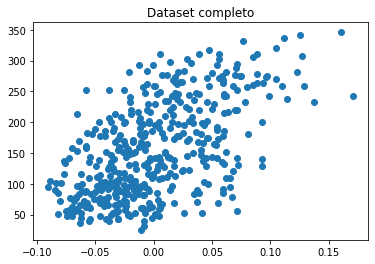

In [155]:
#Visualización
plt.scatter(X_bmi, Y)
plt.title('Dataset completo')
plt.show()

## 2. Separación de los datos en entrenamiento y evaluación

A continuación separaremos los datos en entrenamiento (70\%) y evaluación (30%).

In [156]:
#Separación de los datos
X_train, X_test, Y_train, Y_test = train_test_split(X_bmi,Y, test_size=0.3)
#Longitud de entrada de entrenamiento
print(X_train.shape)
#Longitud de entrada de evaluación
print(X_test.shape)
#Longitud de salida de entrenamiento
print(Y_train.shape)
#Longitud de salida de evaluación
print(Y_test.shape)

(309, 1)
(133, 1)
(309,)
(133,)


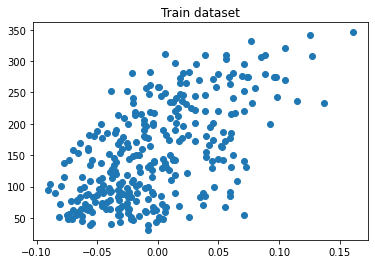

In [157]:
#Visualización datos de entrenamiento
plt.scatter(X_train,Y_train)
plt.title('Train dataset')
plt.show()

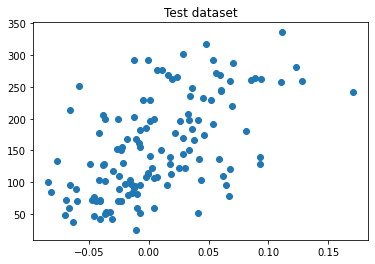

In [158]:
#Visualización datos de evaluación
plt.scatter(X_test,Y_test)
plt.title('Test dataset')
plt.show()

## 3. Estimación de la regresión

Recordemos que un método de regresión lineal está definido por una familia de funciones de la forma:

$$f(x) = wx+b$$

Para estimar los parámetros que mejor describan nuestros datos, bastará enontrar el mínimo de la función:

$$R(w) = \frac{1}{2} ||f(X) - Y||^2$$

El mínimo de esta función se puede estimar obteniendo la derivada de la función e igualando a cero. La derivada de la función está dada por:

\begin{align}
    \nabla_w R(w) &= (f(X) - Y)X \\
                  &= (Xw - Y)X \\
                  &= X^TXw-X^TY
\end{align}

De aquí que, cuando $\nabla_w R(w) = 0$, entonces:

$$w = (X^T X)^{-1}X^TY$$

Nota: Para simplificar el método, agreamos una columna con 1's a los datos de entrada, de tal forma que $x' = [x;1]$. este 1 servirá para representar el bias, de tal forma que la función $f(x) = wx'$; es decir, el bias será una entrada (la última) del vector w.

In [159]:
#Se concatena una columna de 1's a X
Xb = np.concatenate((X_train, np.ones((len(X_train),1))), axis=1)
print(Xb.shape)

(309, 2)


Obtenemos el vector $w$ (este vector incluye el bias).

In [160]:
#XX^-1 
term1 = np.linalg.inv(np.dot(Xb.T,Xb))
#XY
term2 = np.dot(Xb.T,Y_train)

#Vector solución
w = np.dot(term1,term2)

La recta que se ajusta los datos está definida por la función $f(x)$ que depende de $w$. Por tanto, podemos visualizar qué tanto esta recta se ajusta a los datos. En este caso, visualizamos tanto con los datos de entrenamiento como con los de evaluación, pero debe recordarse que la evaluación del modelo de regresión sólo debe realizarse sobre datos que no se vieron en el entrenamiento.

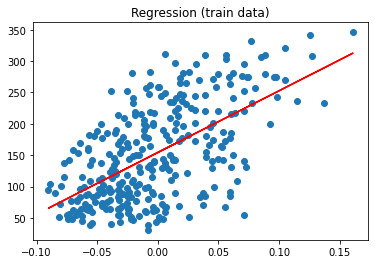

In [161]:
#Visualización en datos de entrenamieno
plt.scatter(X_train, Y_train)
plt.plot(X_train, np.dot(Xb,w), color='r')
plt.title('Regression (train data)')
plt.show()

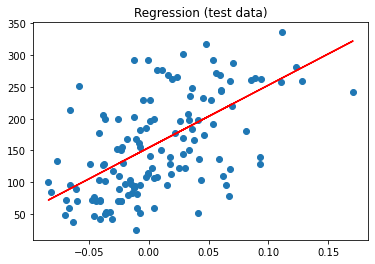

In [162]:
#Visualización en datos de evaluación
plt.scatter(X_test, Y_test)
plt.plot(X_test, np.dot(X_test,w[0])+w[1], color='r')
plt.title('Regression (test data)')
plt.show()

## 4. Evaluación del modelo

Finalmente, podemos ver cómo se comporta el error a través del dataset de entrenamiento y de evaluación. El error que nos interesa reportar (para determinar la capacidad de generalización de nuestro modelo) es el error de evaluación.

In [163]:
'''
Primero definimos una función que calcule el error cuadrático
medio con numpy a partir de los datos de entrada, la variable
de salida y los parámetros calculados por la regresión lineal.
'''
def mean_square_error(X,Y,w):
    Xbias = np.concatenate((X, np.ones((len(Y),1))), axis=1)
    return np.linalg.norm(Y-np.dot(Xbias,w))**2/len(Y)

'''
También definimos una función que calcule el score R2 con numpy
a partir de los datos de entrada, la variable de salida y los
parámetros calculados por la regresión lineal.
'''
def r2_score(X,Y,w):
    Ymean = Y.sum(0)/len(Y)
    SSres = mean_square_error(X,Y,w)*len(X)
    SStot = np.linalg.norm(Y-Ymean)**2
    return 1 - (SSres/SStot)

In [164]:
    #Error de entrenamiento con MSE
print('Error train (MSE):', mean_square_error(X_train,Y_train,w))
#Error de evaluación con MSE
print('Error test (MSR):', mean_square_error(X_test,Y_test,w))

print()

#Error de entrenamiento con R2
print('Error train (R2):', r2_score(X_train,Y_train,w))
#Error de evaluación con R2
print('Error test (R2):', r2_score(X_test,Y_test,w))

Error train (MSE): 3831.974752204557
Error test (MSR): 4051.951218308712

Error train (R2): 0.3562069958738896
Error test (R2): 0.31033443969827135


# Regresión lineal con múltiples variables

## 1. Preparación de los datos

En el caso anterior sólo hemos tomado la variable $bmi$ como variable de entrada en la regresión (esto permite visualizar la regresión en un plano 2-dimensional). Pero la regresión lineal puede estimarse tomando en cuenta $d$ variables de entrada. Así, podemos tomar las 10 variables de los datos y ver cuáles son las que muestran mayor influencia en el desarrollo de la diabetes.

In [165]:
#todos los datos
X_all = data.data

A partir de estos datos obtenemos los parámetros de la función lineal que mejor se ajusten de la forma ya conocida.

In [166]:
#Se agrega una columna de 1's
Xb = np.concatenate((X_all, np.ones((len(X_bmi),1))), axis=1)

#Primer término
term1 = np.linalg.inv(np.dot(Xb.T,Xb))
#Segundo término
term2 = np.dot(Xb.T,Y)

#Obtención de parámetros
W = np.dot(term1,term2)

#Error sobre todo los datos usando la función
#que definimos anteriormente.
print('Error:', mean_square_error(X_all,Y,W))

Error: 2859.6903987680653


## 2. Separación en datos de entrenamiento y evaluación

Los parámetros anteriores se obtuvieron usando todos los datos pero esto hace que la evaluación esté sesgada porque no tenemos forma de evaluar la capacida de generalización del modelo por lo que necesitamos dividir nuestro conjunto de datos.

In [167]:
#Separación de los datos
X_train, X_test, Y_train, Y_test = train_test_split(X_all,Y, test_size=0.3)
#Longitud de entrada de entrenamiento
print(X_train.shape)
#Longitud de entrada de evaluación
print(X_test.shape)
#Longitud de salida de entrenamiento
print(Y_train.shape)
#Longitud de salida de evaluación
print(Y_test.shape)

(309, 10)
(133, 10)
(309,)
(133,)


## 3. Entrenamiento

In [168]:
#Se agrega una columna de 1's
Xb = np.concatenate((X_train, np.ones((len(Y_train),1))), axis=1)

#Primer término
term1 = np.linalg.inv(np.dot(Xb.T,Xb))
#Segundo término
term2 = np.dot(Xb.T,Y_train)

#Obtención de parámetros
W = np.dot(term1,term2)
W

array([ -22.098738  , -188.72190822,  527.5689283 ,  330.28534791,
       -726.87367979,  457.24699523,   84.99739454,  126.81867861,
        737.90843753,   45.03137172,  153.70039683])

##4. Evaluación del modelo
Finalmente, para evaluar el modelo usamos las mismas funciones que definimos anteriormente (ya que por su implementación funciona sin importar la dimensión del vector de entrada) para obtener el error de entrenamiento y evaluación usando el error cuadrático medio y $R^2$.

In [169]:
#Error de entrenamiento con MSE
print('Error train (MSE):', mean_square_error(X_train,Y_train,W))
#Error de evaluación con MSE
print('Error test (MSR):', mean_square_error(X_test,Y_test,W))

print()

#Error de entrenamiento con R2
print('Error train (R2):', r2_score(X_train,Y_train,W))
#Error de evaluación con R2
print('Error test (R2):', r2_score(X_test,Y_test,W))

Error train (MSE): 2893.9852142878403
Error test (MSR): 2811.6327537640423

Error train (R2): 0.5120716632280307
Error test (R2): 0.509884668742925


El vector $W$ que hemos estimado nos da información importante sobre el comportamiento de las variables de entrada. Aquellas variables con mayor correlación influirán más en la decisión del precio. Así, una variable con alta correlación positiva tenderá a tener un peso mayor (positivo), mientras que una variable con correlación negativa tendrá un peso con valor negativo.

In [170]:
pd.DataFrame(W.reshape(1,len(W)), columns=list(data.feature_names)+['bias'])

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,bias
0,-22.098738,-188.721908,527.568928,330.285348,-726.87368,457.246995,84.997395,126.818679,737.908438,45.031372,153.700397


Podemos visualizar algunas de estas variables para ver el comportamiento lineal que muestran con respecto a la variable $Y$.

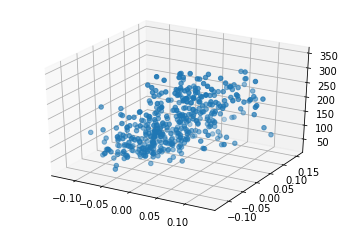

In [173]:
from mpl_toolkits.mplot3d import Axes3D

#Visualización de dos variables
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(table_data[['s5']].to_numpy(), table_data[['s1']].to_numpy(), Y)
plt.show()

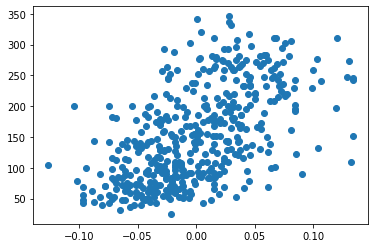

In [172]:
#Visualización de una variable
plt.scatter(table_data[['s5']].to_numpy(), Y)
plt.show()